# Boostrapping - Intervalo de confiança para algum parâmetro para tomada de decisão

## Aula 22

## Contexto Prático


**Preparo Prévio:**
1. Magalhães e Lima, seção 7.4. Concentrar-se em intervalo de confiança para média amostra
1. Bootstrapping - https://www.thoughtco.com/example-of-bootstrapping-3126155
1. Bootstrapping - https://www.stat.auckland.ac.nz/~wild/BootAnim/

**Hoje:**
1. Entender e implementar o método não paramétrico de Bootstrapping com intuito de avaliar se um parâmetro é igual a um determinado valor ou se parâmetro é $\neq$ que esse determinado valor.

___

In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

___
## Exercício 1

# Qualidade do Termopar

O tempo de vida, em horas, de um termopar* usado em fornalhas tem distribuição desconhecida. 

Uma amostra aleatória de 15 termopares resultaram nos seguintes tempos:

`553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529`

___
**Pergunta 1:** A empresa diz que um termopar deve durar, em média, 560 horas. Há evidências de que essa afirmação seja verdadeira? Considere um coeficiente de confiança de 95%.

**Deixe claro:**

  1. Reconstruir a medida amostral usando o bootstrapping, considerando os dados.

  2. Montar as Hipóteses e o intervalo de confiança para o parâmetro de interesse com um nível de confiança de $\gamma$% recomendado. Concluir em termos do problema!

**Resposta:**

Parâmetro de interesse aqui: **Média populacional**

### Hipóteses em termos do problema e em termos estatísticos

$H_0:$ A afirmação da empresa quanto tempo médio de duração procede $\Rightarrow H_0: \mu=560$

$H_1:$ A afirmação da empresa quanto tempo médio de duração NÃO procede   $\Rightarrow H_1: \mu\neq560$

In [2]:
x = [553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529]
x = pd.Series(x)
n = len(x)

print("Tamanho da Amostra: {0}".format(n))
print("Média amostral: {0}".format(np.mean(x)))
print("Desvio Padrão amostral: {0}".format(np.std(x, ddof=1)))

Tamanho da Amostra: 15
Média amostral: 551.3333333333334
Desvio Padrão amostral: 14.811514182586208


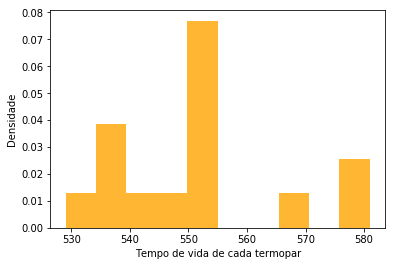

In [3]:
plt.hist(x, density=True, color='orange', alpha=0.8)
plt.xlabel("Tempo de vida de cada termopar")
plt.ylabel("Densidade");

In [4]:
#Calculando as médias em cada reamostra JÁ QUE MÉDIA É A CARACTERÍSTICA DE INTERESSE
B = 100000
X_ = []
for i in range(B):
    reamostra_x = np.random.choice(x, size=n, replace=True)
    X_.append(reamostra_x.mean())

print("Média das médias amostrais: ", np.mean(X_))
print("Variância das médias amostrais: ", np.var(X_))

Média das médias amostrais:  551.3305693333334
Variância das médias amostrais:  13.646418493637336


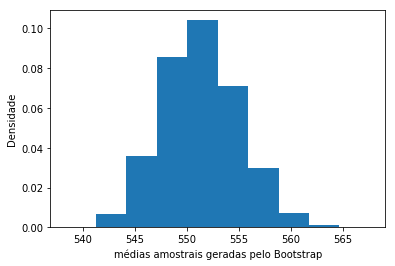

In [5]:
plt.hist(X_, density=True)
plt.xlabel("médias amostrais geradas pelo Bootstrap")
plt.ylabel("Densidade");

In [6]:
#Intervalo de confiança Bootstrap Percentil (ou Quantil)
𝛾 = 0.95
𝛼 = 1 - 𝛾

Lim_inf = np.percentile(X_, (𝛼/2)*100)
Lim_sup = np.percentile(X_, (1-𝛼/2)*100)
print('Limite inferior:', Lim_inf)
print('Limite superior:', Lim_sup)


Limite inferior: 544.4666666666667
Limite superior: 558.8666666666667


**Conclusão:** Como o tempo médio duração desejável de $560$ não faz parte do intervalo de confiança que representa o ATUAL comportamento do tempo médio de duração de termopares, então há evidências de que a afirmação NÃO procede, com 95% de confiança.

___
**Pergunta 2:** A empresa deseja saber se tempo mediano de duração dos termopares é igual a $555$ horas. Assim, verifique se há evidências de que a afirmação procede considerando um coeficiente de confiança de 99%.

**Deixe claro:**

  1. Reconstruir a medida amostral usando o bootstrapping, considerando os dados.

  2. Montar as Hipóteses e o intervalo de confiança para o parâmetro de interesse com um nível de confiança de $\gamma$% recomendado. Concluir em termos do problema!

**Resposta:**

Parâmetro de interesse aqui: **Mediana populacional**

### Hipóteses em termos do problema e em termos estatísticos

$H_0:$ Tempo mediano de duração do termopar vale  $\Rightarrow H_0:$ mediana populacional $=555$

$H_1:$ Tempo mediano de duração do termopar não vale   $\Rightarrow H_1:$ mediana populacional $\neq555$

In [7]:
x = [553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529]
x = pd.Series(x)
n = len(x)


In [8]:
print("Tamanho da Amostra: {0}".format(n))
print("Mediana amostral: {0}".format(np.median(x)))


Tamanho da Amostra: 15
Mediana amostral: 552.0


In [9]:
#Calculando as MEDIANAS em cada reamostra JÁ QUE MEDIANA É A CARACTERÍSTICA DE INTERESSE
B = 100000
Med = []
for i in range(B):
    reamostra_x = np.random.choice(x, size=n, replace=True)
    Med.append(np.median(reamostra_x))

print("Média das medianas amostrais: ", np.mean(Med))


Média das medianas amostrais:  550.13783


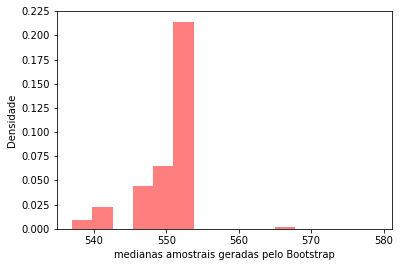

In [10]:
plt.hist(Med, density=True, bins=15, color='red', alpha=0.5)
plt.xlabel("medianas amostrais geradas pelo Bootstrap")
plt.ylabel("Densidade");

In [11]:
#Intervalo de confiança Bootstrap Percentil (ou Quantil)
𝛾 = 0.99
𝛼 = 1 - 𝛾

Lim_inf = np.percentile(Med, (𝛼/2)*100)
Lim_sup = np.percentile(Med, (1-𝛼/2)*100)
print('Limite inferior:', Lim_inf)
print('Limite superior:', Lim_sup)


Limite inferior: 539.0
Limite superior: 553.0


**Conclusão:** Como o tempo de duração desejável de $555$h não faz parte do intervalo de confiança que representa o ATUAL comportamento do tempo MEDIANO de duração de termopares, então há evidências de que a afirmação NÃO procede, com 99% de confiança.

___
**Pergunta 3:** A empresa diz que a dispersão no tempo de duração dos termopares deve ter desvio padrão IDEAL igual a 16 horas. Há evidências de que a variância do tempo de duração dos termopares produzidos está igual ou diferente do valor IDEAL afirmado pela empresa? Considere um coeficiente de confiança de 90%.

**Deixe claro:**

  1. Reconstruir a medida amostral usando o bootstrapping, considerando os dados.

  2. Montar as Hipóteses e o intervalo de confiança para o parâmetro de interesse com um nível de confiança de $\gamma$% recomendado. Concluir em termos do problema!

**Resposta:**

Parâmetro de interesse aqui: **Variância populacional**

### Hipóteses em termos do problema e em termos estatísticos

$H_0:$ A variância do tempo de duração dos termopares produzidos está igual ao valor IDEAL $\Rightarrow H_0: \sigma^2=16^2$

$H_1:$ A variância do tempo de duração dos termopares produzidos NÃO está igual ao valor IDEAL $\Rightarrow H_0: \sigma^2\neq16^2$

In [12]:
x = [553, 552, 567, 579, 550, 541, 537, 553, 552, 546, 538, 553, 581, 539, 529]
x = pd.Series(x)
n = len(x)


In [13]:
print("Tamanho da Amostra: {0}".format(n))
print("Variância amostral: {0}".format(np.var(x, ddof=1)))
print("Desvio Padrão amostral: {0}".format(np.std(x, ddof=1)))

Tamanho da Amostra: 15
Variância amostral: 219.38095238095238
Desvio Padrão amostral: 14.811514182586208


In [14]:
#Calculando as VARIÂNCIAS AMOSTRAIS em cada reamostra JÁ QUE VARIÂNCIA É A CARACTERÍSTICA DE INTERESSE
B = 100000
S2 = []
for i in range(B):
    reamostra_x = np.random.choice(x, size=n, replace=True)
    S2.append(reamostra_x.var(ddof=1)) #Considerando a variância amostral não viesada

print("Média das variâncias amostrais: ", np.mean(S2))

Média das variâncias amostrais:  204.70183504761906


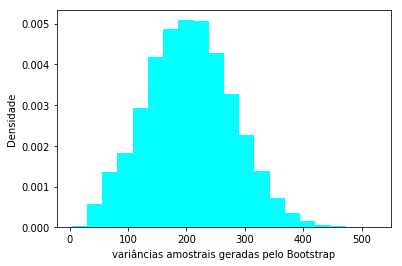

In [15]:
plt.hist(S2, density=True, bins=20, color='cyan')
plt.xlabel("variâncias amostrais geradas pelo Bootstrap")
plt.ylabel("Densidade");

In [16]:
#Intervalo de confiança Bootstrap Percentil (ou Quantil)
𝛾 = 0.9
𝛼 = 1 - 𝛾

Lim_inf = np.percentile(S2, (𝛼/2)*100)
Lim_sup = np.percentile(S2, (1-𝛼/2)*100)
print('Limite inferior:', Lim_inf)
print('Limite superior:', Lim_sup)


Limite inferior: 81.06666666666669
Limite superior: 328.63809523809533


In [17]:
#Valor IDEAL
print("Valor IDEAL para variância no tempo de duração dos termopares segundo afirmação deve ser ", 16**2, "horas^2")

Valor IDEAL para variância no tempo de duração dos termopares segundo afirmação deve ser  256 horas^2


**Conclusão:** Como a variância IDEAL desejável de $256$ faz parte do intervalo de confiança que representa o ATUAL comportamento da variância do tempo de duração dos termopares, então há evidências de que variância ATUAL não difere da IDEAL, com 90% de confiança.

___

## Exercício 2

# Qualidade da linha de produção

As latas de certa marca de refrigerante apresentam em seu rótulo o volume de 350 ml. Ainda, um órgão regulador diz que a dispersão (mensurada pelo desvio padrão) dessas quantidades deve ser de 10 ml em seu conteúdo. 

** Linha de produção deve ser parada? **

**Conjectura 1:** O fabricante deseja testar se o conteúdo médio das latas é igual a 350 ml, como anunciado no rótulo. Isto equivale a verificar se a máquina está regulada para colocar 350 ml, ou não, nas latas. 

**Conjectura 2:** O fabricante deseja avaliar se a variabilidade dos conteúdos está sendo respeitada ou não. *Fazer considerando variância.*

Para averiguar tais hipóteses do fabricante, foi coletada uma amostra de 36 latas do refrigerante em pontos de comercialização e mediu-se o conteúdo destas latas.

Os resultados obtidos na amostra foram:

dados = [344.5,  352.9,  355.0,  348.8,
        	342.0,  344.7,  346.9,  340.9,
            357.7,  341.2,  347.1,  365.3,
            340.3,  343.2,  342.6,  333.7,
        	341.9,  351.0,  348.0,  354.3,
        	344.9,  348.0,  346.4,  358.0,
        	340.2,  354.4,  349.7,  339.4,
        	338.8,  344.9,  330.4,  341.7,
        	336.7,  363.2,  355.9,  357.4]


Avalie tais hipóteses com 95% de confiança?

Responda se a linha de produção deve ser interrompida e por qual motivo?

In [18]:
dados = [344.5,  352.9,  355.0,  348.8,
            342.0,  344.7,  346.9,  340.9,
            357.7,  341.2,  347.1,  365.3,
            340.3,  343.2,  342.6,  333.7,
            341.9,  351.0,  348.0,  354.3,
            344.9,  348.0,  346.4,  358.0,
            340.2,  354.4,  349.7,  339.4,
            338.8,  344.9,  330.4,  341.7,
            336.7,  363.2,  355.9,  357.4]

dados = pd.Series(dados)
n = len(dados)

print("Tamanho da Amostra: {0}".format(n))
print("Média: {0}".format(np.mean(dados)))
print("Desvio Padrão: {0}".format(np.std(dados, ddof=1)))

Tamanho da Amostra: 36
Média: 347.0
Desvio Padrão: 7.990601622263139


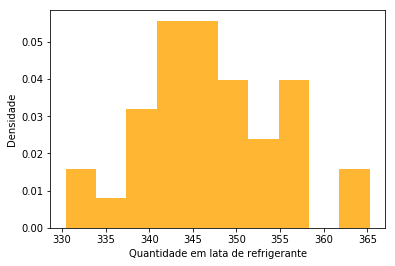

In [19]:
plt.hist(dados, density=True, color='orange', alpha=0.8)
plt.xlabel("Quantidade em lata de refrigerante")
plt.ylabel("Densidade");

___
**Resposta: Conjectura 1**

### Analisando a medida Média - Boostrap

Parâmetro de interesse aqui: **Média populacional**

### Hipóteses em termos do problema e em termos estatísticos

$H_0:$ Máquina está regulada $\Rightarrow H_0: \mu=350$

$H_1:$ Máquina NÃO está regulada  $\Rightarrow H_1: \mu\neq350$

In [20]:
#Calculando as médias em cada reamostra JÁ QUE MÉDIA É A CARACTERÍSTICA DE INTERESSE
B = 100000
X_ = []
for i in range(B):
    reamostra_x = np.random.choice(dados, size=n, replace=True)
    X_.append(reamostra_x.mean())

print("Média das médias amostrais: ", np.mean(X_))
print("Variância das médias amostrais: ", np.var(X_))

Média das médias amostrais:  347.00361166666664
Variância das médias amostrais:  1.7263103092589471


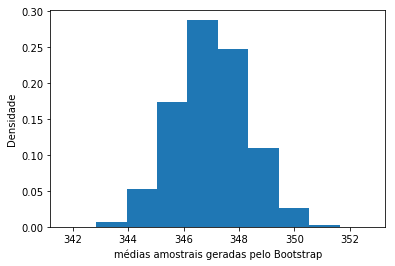

In [21]:
plt.hist(X_, density=True)
plt.xlabel("médias amostrais geradas pelo Bootstrap")
plt.ylabel("Densidade");

In [22]:
#Intervalo de confiança Bootstrap Percentil (ou Quantil)
𝛾 = 0.95
𝛼 = 1 - 𝛾

Lim_inf = np.percentile(X_, (𝛼/2)*100)
Lim_sup = np.percentile(X_, (1-𝛼/2)*100)
print('Limite inferior:', Lim_inf)
print('Limite superior:', Lim_sup)


Limite inferior: 344.46388888888885
Limite superior: 349.6111111111111


**Conclusão:** Como a quantidade média desejável pelo rótulo $350$ml não faz parte do intervalo de confiança que representa o ATUAL comportamento da quantidade média de refrigerante nas latas, então há evidências de que a afirmação NÃO procede, com 95% de confiança.

___
**Resposta: Conjectura 2**

### Analisando a medida Variância - Boostrap

Parâmetro de interesse aqui: **Variância populacional**

### Hipóteses em termos do problema e em termos estatísticos

$H_0:$ A variância da quantidade de refrigerantes está igual ao valor IDEAL $\Rightarrow H_0: \sigma^2=10^2$

$H_1:$ A variância da quantidade de refrigerantes está igual ao valor IDEAL $\Rightarrow H_0: \sigma^2\neq10^2$

In [23]:
print("Tamanho da Amostra: {0}".format(n))
print("Variância amostral: {0}".format(np.var(dados, ddof=1)))
print("Desvio Padrão amostral: {0}".format(np.std(dados, ddof=1)))

Tamanho da Amostra: 36
Variância amostral: 63.849714285714306
Desvio Padrão amostral: 7.990601622263139


In [24]:
#Calculando as VARIÂNCIAS AMOSTRAIS em cada reamostra JÁ QUE VARIÂNCIA É A CARACTERÍSTICA DE INTERESSE
B = 100000
S2 = []
for i in range(B):
    reamostra_x = np.random.choice(dados, size=n, replace=True)
    S2.append(reamostra_x.var(ddof=1)) #Considerando a variância amostral não viesada

print("Média das variâncias amostrais: ", np.mean(S2))

Média das variâncias amostrais:  62.03665950682542


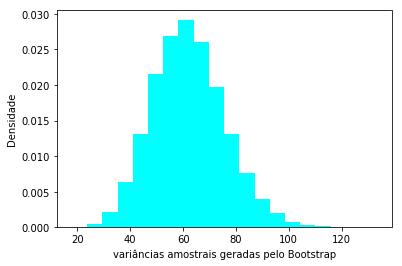

In [25]:
plt.hist(S2, density=True, bins=20, color='cyan')
plt.xlabel("variâncias amostrais geradas pelo Bootstrap")
plt.ylabel("Densidade");

In [26]:
#Intervalo de confiança Bootstrap Percentil (ou Quantil)
𝛾 = 0.95
𝛼 = 1 - 𝛾

Lim_inf = np.percentile(S2, (𝛼/2)*100)
Lim_sup = np.percentile(S2, (1-𝛼/2)*100)
print('Limite inferior:', Lim_inf)
print('Limite superior:', Lim_sup)


Limite inferior: 37.31317619047616
Limite superior: 90.75053968253975


In [27]:
#Valor IDEAL
print("Valor IDEAL para variância na quantidade de refrigerantes nas latas segundo afirmação deve ser ", 10**2, "ml^2")

Valor IDEAL para variância na quantidade de refrigerantes nas latas segundo afirmação deve ser  100 ml^2


**Conclusão:** Como a variância IDEAL desejável de $100$ ml$^2$ NÃO faz parte do intervalo de confiança que representa o ATUAL comportamento da variância da quantidade de refrigerantes nas latas, então há evidências de que variância ATUAL difere da IDEAL, com 95% de confiança.

___
## Exercício 3

# Experimento dos resistores

** Compraria o lote de resistores pelo valor médio e pela tolerância? **

Use a sua amostra para concluir se compraria o lote de resistores pelo controle de qualidade tanto quanto aos $1000 k\Omega$ avaliado pela média e quanto aos $5\%$ de tolerância avaliado pela variância ($5\%$ de $1000 = 50$, logo, variância IDEAL igual $50^2$ $k\Omega^2$.

Use 95% de confiança para tomada de decisão!

In [28]:
#dados=[COLOQUE SUA AMOSTRA AQUI]